# Introduction to `geoplanar`

### Mexico level 2 - municipalities

In [1]:
import geoplanar
import geopandas


<AxesSubplot:>

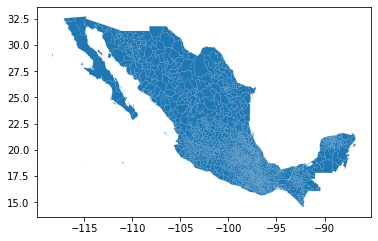

In [2]:
mexico = geopandas.read_file("../geoplanar/datasets/mexico/lvl2/mex_admbnda_adm2_govmex_20210618.shp")
mexico.plot() # states

In [3]:
import libpysal

In [4]:
us = libpysal.examples.load_example('us_income')

In [5]:
us.get_file_list()

['/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/spi_download.csv',
 '/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/usjoin.csv',
 '/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/states48.gal',
 '/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/README.md',
 '/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/us48.shx',
 '/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/us48.shp',
 '/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/libpysal/examples/us_income/us48.dbf']

In [6]:
us = geopandas.read_file(us.get_path("us48.shp"))

us.crs = mexico.crs
us = us.to_crs(mexico.crs)

<AxesSubplot:>

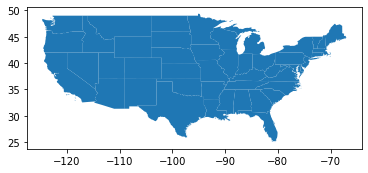

In [7]:
us.plot()

In [8]:
usmex = us.append(mexico)

<AxesSubplot:>

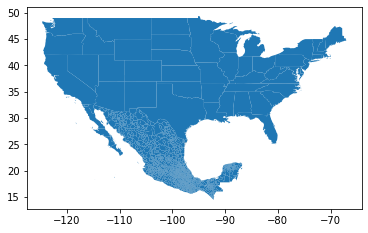

In [9]:
usmex.plot()

In [10]:
usmex.head()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,Shape_Leng,...,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo
0,20.750,34.956,1.0,1.0,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45.132,34.527,2.0,2.0,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.571,18.899,3.0,3.0,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.874,21.353,4.0,4.0,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22.598,22.746,5.0,5.0,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
usmex.shape

(2505, 23)

In [12]:
usmex.tail()

,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,Shape_Leng,...,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo
2452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-97.45715 20.11801, -97.45432 ...",0.317453,...,None,None,None,Puebla,MX21,México,MX,2020-06-23,2021-06-18,None
2453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-96.86264 18.48293, -96.86202 18.482...",1.141389,...,Zoquitlan,None,None,Puebla,MX21,México,MX,2020-06-23,2021-06-18,None
2454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-97.51460 20.17004, -97.51447 20.169...",0.499022,...,None,None,None,Veracruz de Ignacio de la Llave,MX30,México,MX,2020-06-23,2021-06-18,None
2455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-99.54972 18.88836, -99.55067 18.886...",0.738143,...,Zumpahuacan,None,None,México,MX15,México,MX,2020-06-23,2021-06-18,None
2456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-98.98922 19.88144, -98.99125 19.880...",1.204982,...,None,None,None,México,MX15,México,MX,2020-06-23,2021-06-18,None


We have appended the Mexico gdf to the US gdf. For now, however, we are going to zoom in on a subset of the border region to investigate things further:

In [13]:
from shapely.geometry import box

clipper = geopandas.GeoDataFrame(geometry =[box(-109, 25, -97, 33)])


In [14]:
usborder = geopandas.clip(clipper, us)
mexborder = geopandas.clip(clipper, mexico)

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  


<AxesSubplot:>

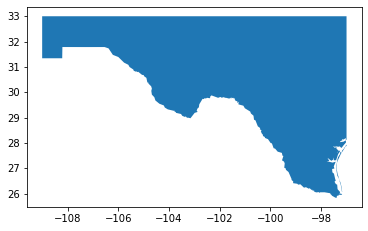

In [15]:
usborder.plot()

<AxesSubplot:>

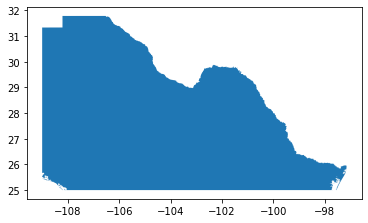

In [16]:
mexborder.plot()

In [17]:
usmex = usborder.append(mexborder)
usmex.reset_index(inplace=True)

<AxesSubplot:>

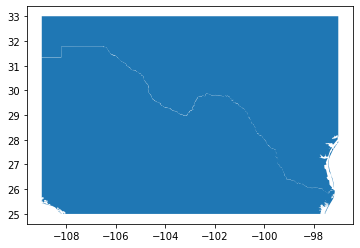

In [18]:
usmex.plot()

## Border discrepancies

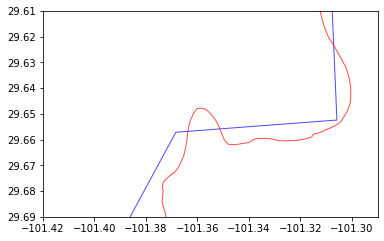

In [19]:
base = usborder.plot(alpha=0.7, facecolor='none', edgecolor='blue')
_ = mexborder.plot(alpha=0.7, facecolor='none', edgecolor='red', ax=base)
_ = base.set_xlim(-101.42, -101.29)
_ = base.set_ylim(29.69, 29.61)


## Fixing Overlaps/Overshoots

In [20]:
usmex = usborder.append(mexborder)
usmex.reset_index(inplace=True)
usmex['COUNTRY'] = ["US", "MEXICO"]

usmex.area

0    42.837167
1    51.649657
dtype: float64

In [21]:
border_overlaps_removed = geoplanar.trim_overlaps(usmex)
border_overlaps_removed.area # mexico gets trimmed

0    42.837167
1    51.608919
dtype: float64

In [22]:
border_overlaps_removed_1 = geoplanar.trim_overlaps(usmex, largest=False)
border_overlaps_removed_1.area # us gets trimmed

0    42.796428
1    51.649657
dtype: float64

## Fixing undershoots/holes

Trimming the overlaps removes the areas where points belong to both national polygons. What remains after this correction are holes (slivers) where points belong to neither polygon.

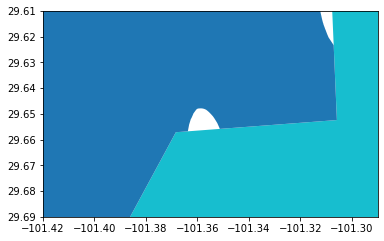

In [23]:
base = border_overlaps_removed.plot(column='COUNTRY')
_ = base.set_xlim(-101.42, -101.29)
_ = base.set_ylim(29.69, 29.61)

In [24]:
holes = geoplanar.holes(border_overlaps_removed)

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/geoplanar/hole.py:47: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _holes = dbu.explode()


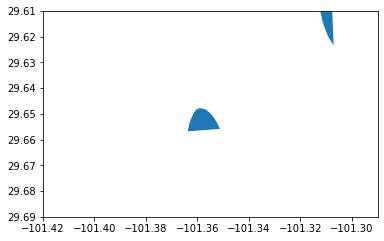

In [25]:
base = holes.plot()
_ = base.set_xlim(-101.42, -101.29)
_ = base.set_ylim(29.69, 29.61)

In [26]:
holes.shape

(231, 1)

For the entire border region there are 231 holes that exist. These can be corrected, by merging the hole with the larger intersecting national polygon:

In [27]:
final = geoplanar.fill_holes(border_overlaps_removed)

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/geoplanar/hole.py:47: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _holes = dbu.explode()
/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/IPyt

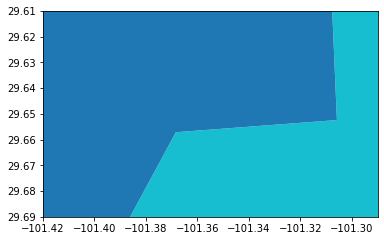

In [28]:
base = final.plot(column='COUNTRY')
_ = base.set_xlim(-101.42, -101.29)
_ = base.set_ylim(29.69, 29.61)


In [29]:
h1 = geoplanar.holes(final)

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/geoplanar/hole.py:47: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _holes = dbu.explode()


In [30]:
h1.shape 

(0, 1)

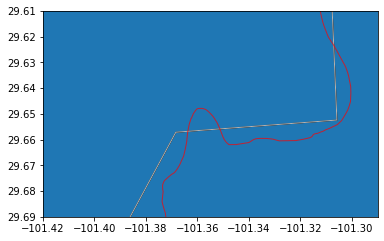

In [31]:
base = final.plot(edgecolor='k')
_ = usborder.plot(alpha=0.7, facecolor='none', edgecolor='white', ax = base)
_ = mexborder.plot(alpha=0.7, facecolor='none', edgecolor='red', ax=base)
_ = base.set_xlim(-101.42, -101.29)
_ = base.set_ylim(29.69, 29.61)



In [32]:
final.area

0    42.837167
1    51.686067
dtype: float64

## Changing the defaults

In [33]:
usmex = usborder.append(mexborder)
usmex.reset_index(inplace=True)
usmex['COUNTRY'] = ["US", "MEXICO"]

usmex.area

0    42.837167
1    51.649657
dtype: float64

In [34]:
border_overlaps_removed_mx = geoplanar.trim_overlaps(usmex, largest=False)


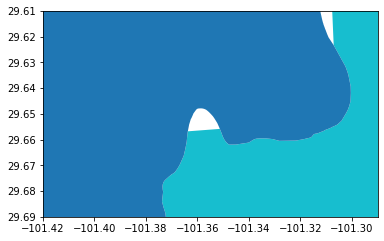

In [35]:
base = border_overlaps_removed_mx.plot(column='COUNTRY')
_ = base.set_xlim(-101.42, -101.29)
_ = base.set_ylim(29.69, 29.61)

In [36]:
final_mx = geoplanar.fill_holes(border_overlaps_removed_mx, largest=False)

/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/geoplanar/hole.py:47: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  _holes = dbu.explode()
/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ecv/anaconda3/envs/geoplanar_docs/lib/python3.7/site-packages/IPyt

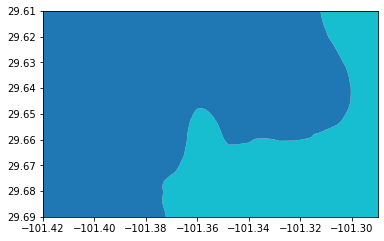

In [37]:
base = final_mx.plot(column='COUNTRY')
_ = base.set_xlim(-101.42, -101.29)
_ = base.set_ylim(29.69, 29.61)
